In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
data = pd.read_csv('stock_price.csv', index_col='日付け', parse_dates=True)
axis = ['close', 'open', 'high', 'low', 'volume', 'rate']
data.columns = axis
data.index.name = 'date'
data = data.sort_index()
data.head(-1)

,close,open,high,low,volume,rate
date,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%
1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
...,...,...,...,...,...,...
2024-07-25,158.1,157.0,159.0,156.8,190.62M,-0.25%
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%


In [205]:
print(data.describe())

             close         open         high          low
count  9202.000000  9202.000000  9202.000000  9202.000000
mean     92.180961    92.256183    93.176451    91.330146
std      50.452228    50.598215    51.049837    50.087405
min      33.000000    33.000000    33.200000    32.200000
25%      52.000000    52.100000    52.800000    51.500000
50%      85.100000    85.100000    86.050000    84.200000
75%     110.800000   110.800000   111.900000   109.275000
max     305.900000   309.800000   311.800000   303.900000


In [206]:
# sns.pairplot(data, x_vars=['open', 'high', 'low', 'volume'], y_vars='close')

In [207]:
data.index[0].day_name()

'Thursday'

<Axes: xlabel='date'>

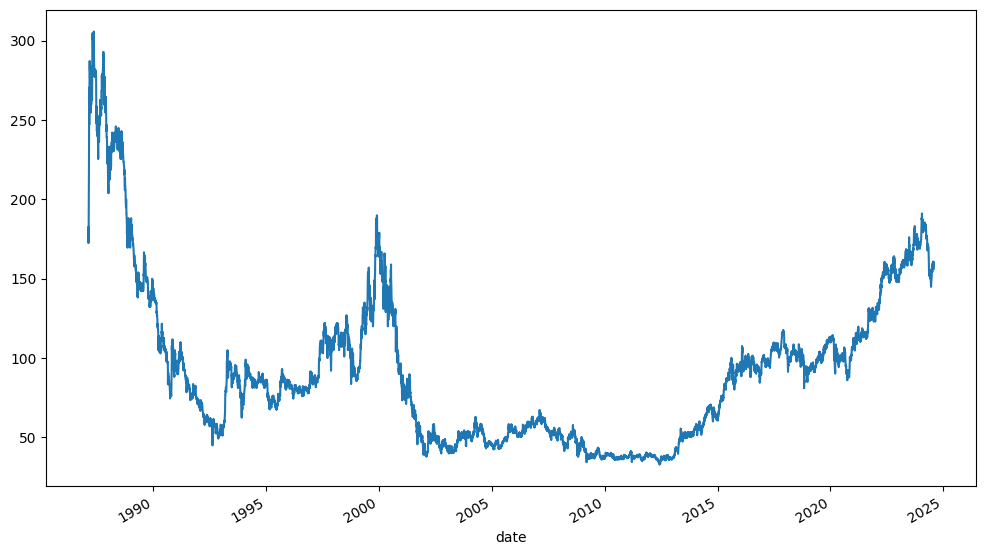

In [208]:
data['close'].plot()

C:\Users\nabem\AppData\Local\Temp\ipykernel_2336\1208210713.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  numeric_data.resample('M').mean().plot()


<Axes: xlabel='date'>

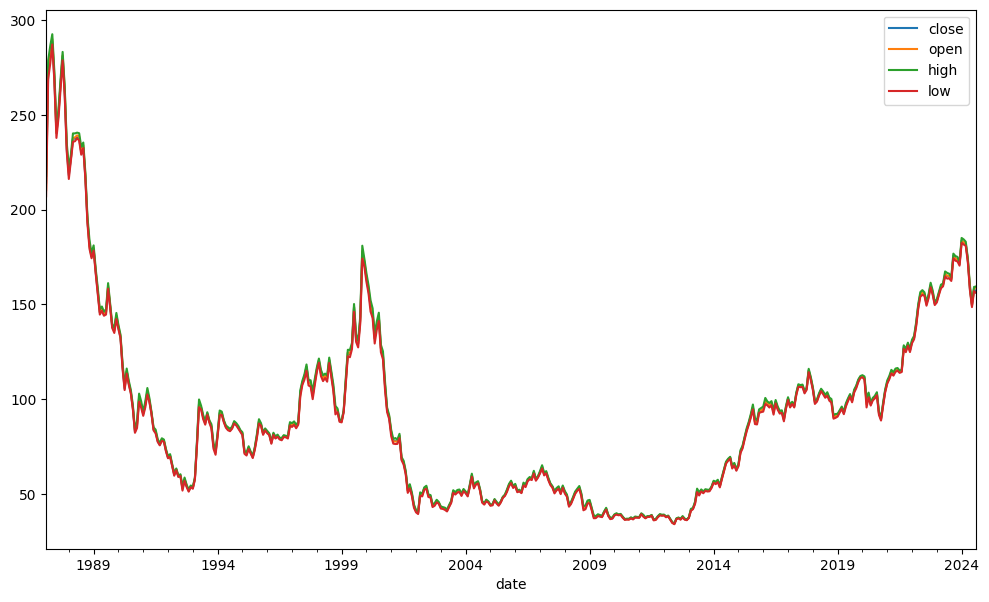

In [209]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.resample('M').mean().plot()

<Axes: xlabel='date'>

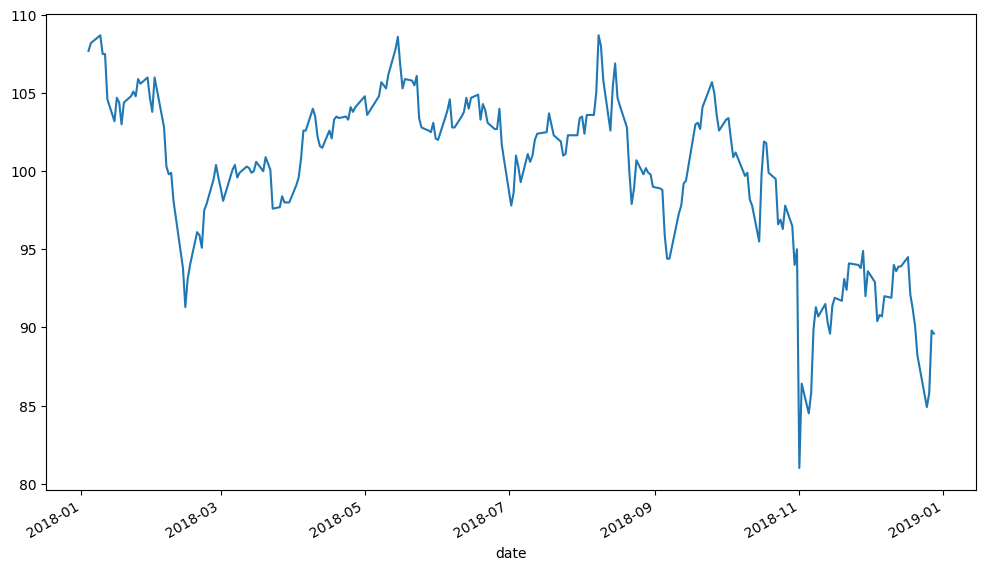

In [210]:
data.loc['2018', 'close'].plot()

C:\Users\nabem\AppData\Local\Temp\ipykernel_2336\3791574014.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  m = data['close'].resample('M').mean()


<Axes: xlabel='date'>

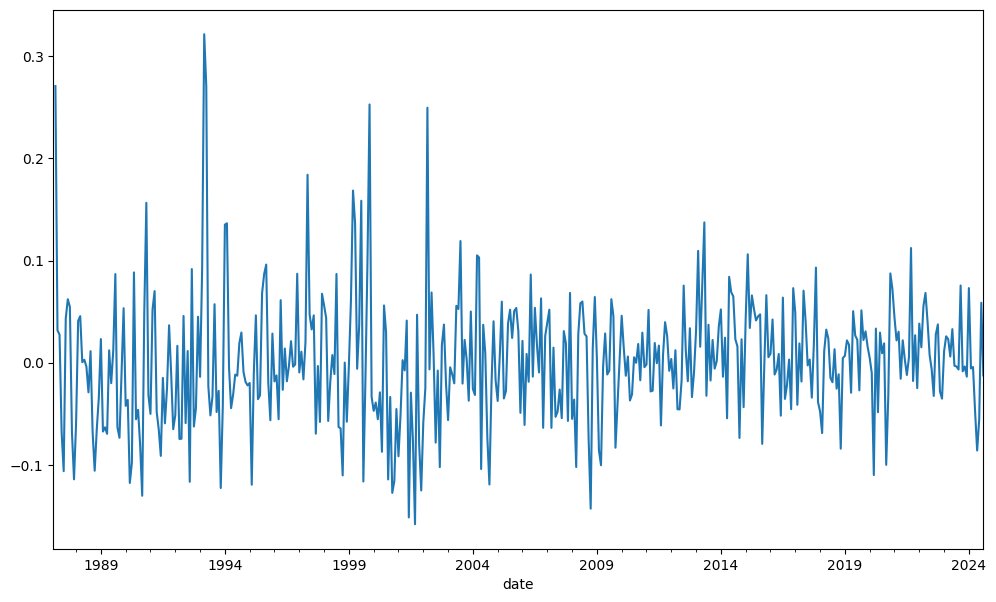

In [211]:
m = data['close'].resample('M').mean()
m.pct_change().plot()

,close,open,high,low,volume,rate,moving_avg
date,,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%,NaN
1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%,177.45
1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%,176.80
1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%,178.20
1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%,180.80
1987-02-19,196.1,196.1,196.1,193.1,748.25M,2.56%,183.54
1987-02-20,210.8,200.0,211.8,200.0,902.27M,7.50%,191.20
1987-02-23,235.3,214.7,235.3,211.8,798.79M,11.62%,203.16
1987-02-24,270.6,258.8,272.5,257.8,605.42M,15.00%,220.80


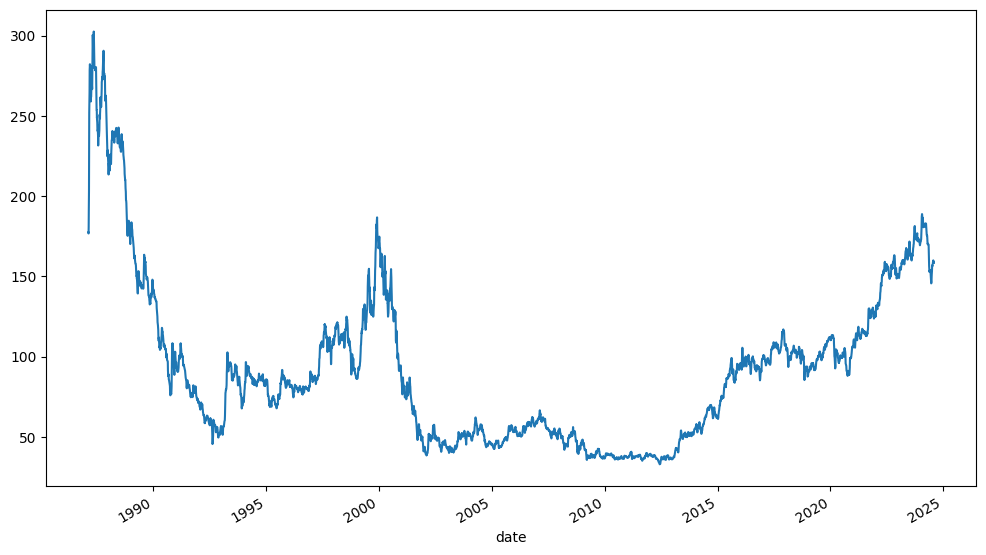

In [212]:
data['moving_avg'] = data['close'].rolling(window=5, min_periods=2).mean()
data['moving_avg'].plot()
data.head(10)

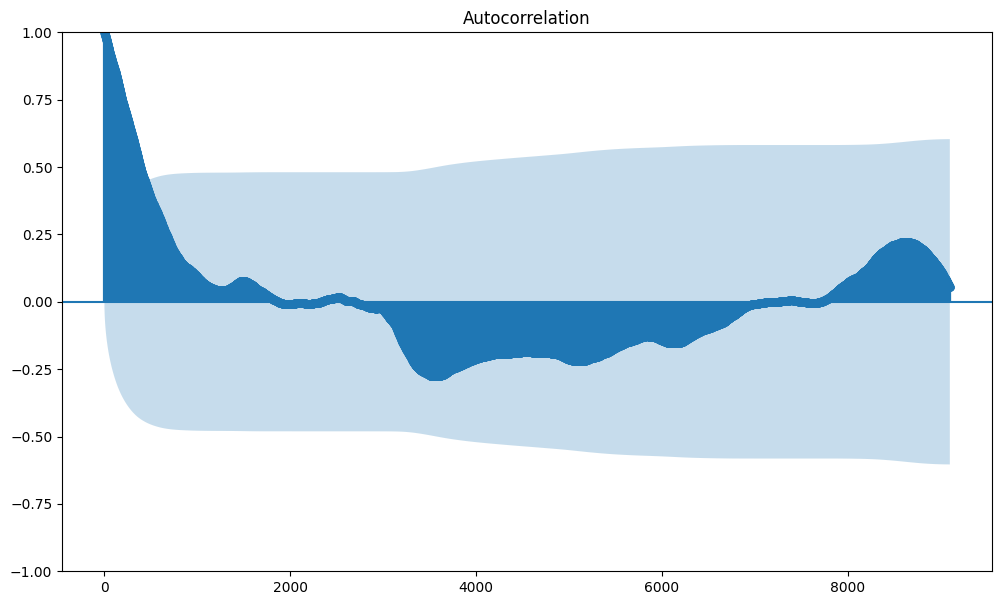

In [213]:
import statsmodels.api as sm

x = sm.graphics.tsa.plot_acf(data['close'], lags=9100)

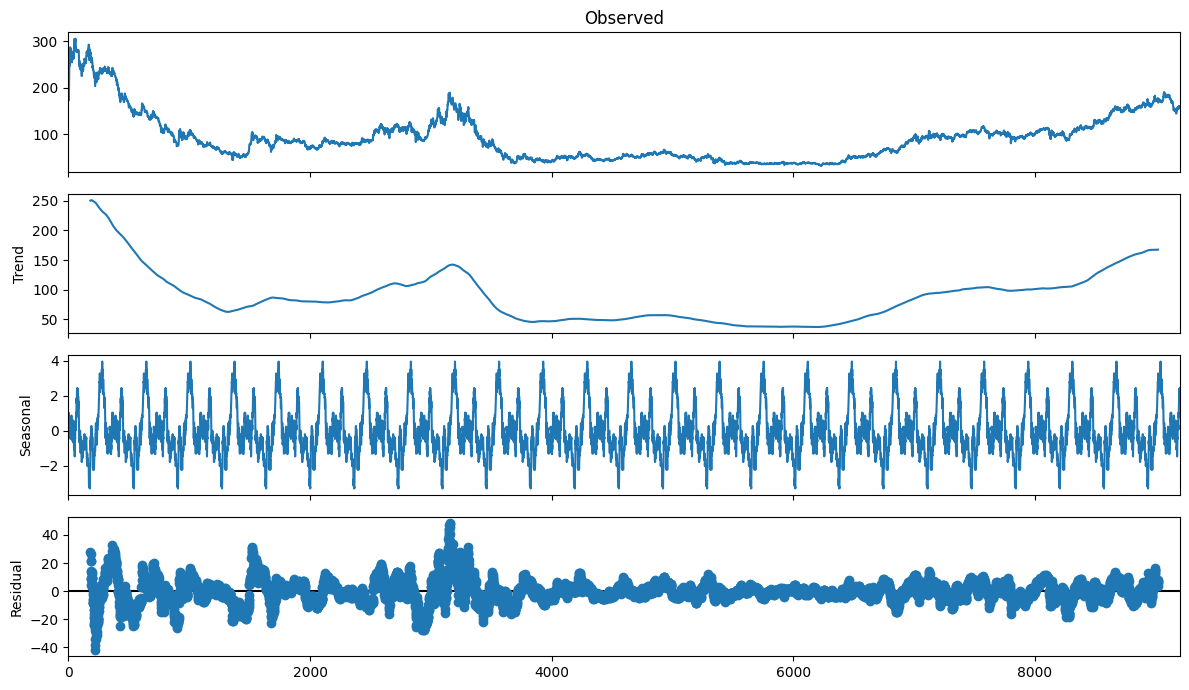

In [214]:
x = sm.tsa.seasonal_decompose(data['close'].values, period=365).plot()

In [215]:
# data = data.sort_index()
df = data.loc['1990':'2022']

In [ ]:
import statsmodels.tsa.statespace.sarimax as sarimax

model = sarimax.SARIMAX(df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 365))
result = model.fit()
result.summary()

c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


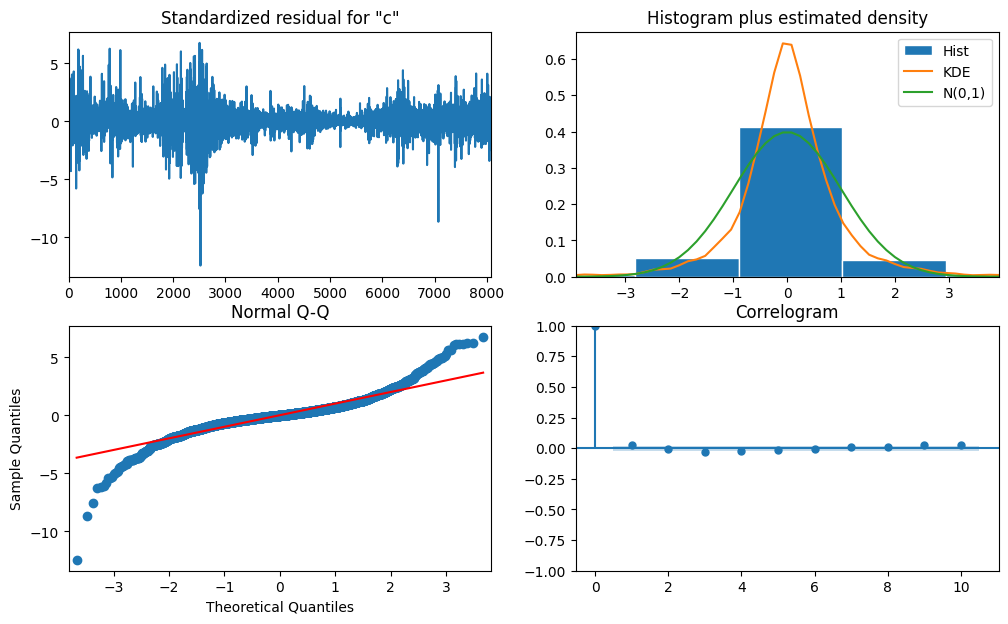

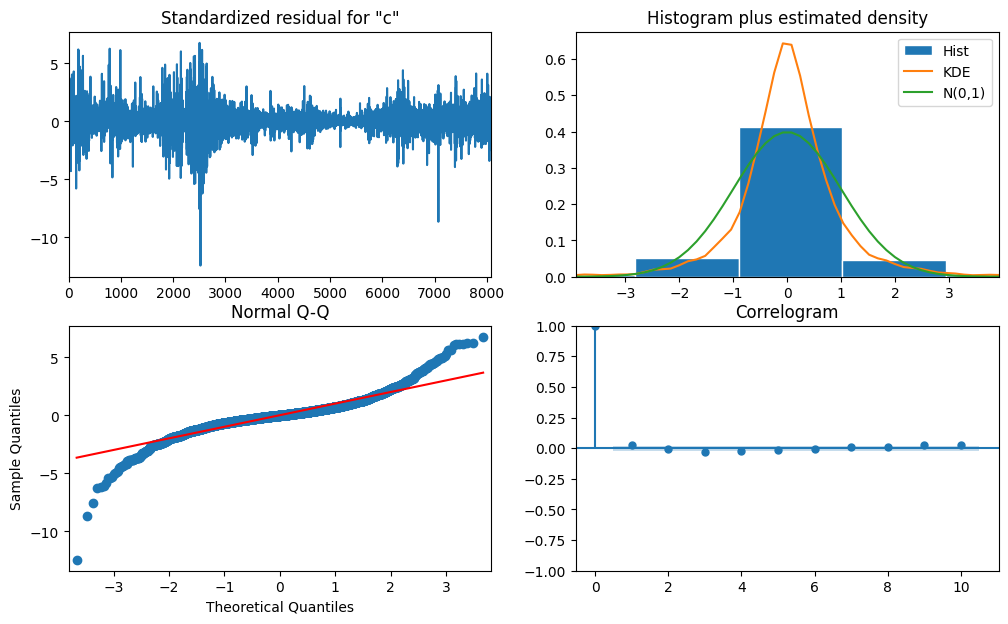

In [ ]:
plt.rc('figure', figsize=(12, 7))
x = result.plot_diagnostics(lags=10)

In [ ]:
data = data.sort_index()
data

,close,open,high,low,volume,rate,moving_avg
date,,,,,,,
1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%,180.800000
1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%,183.540000
1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%,191.200000
1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%,203.160000
1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%,220.800000
...,...,...,...,...,...,...,...
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%,158.600000
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%,158.775000
2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%,158.466667


c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nabem\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')


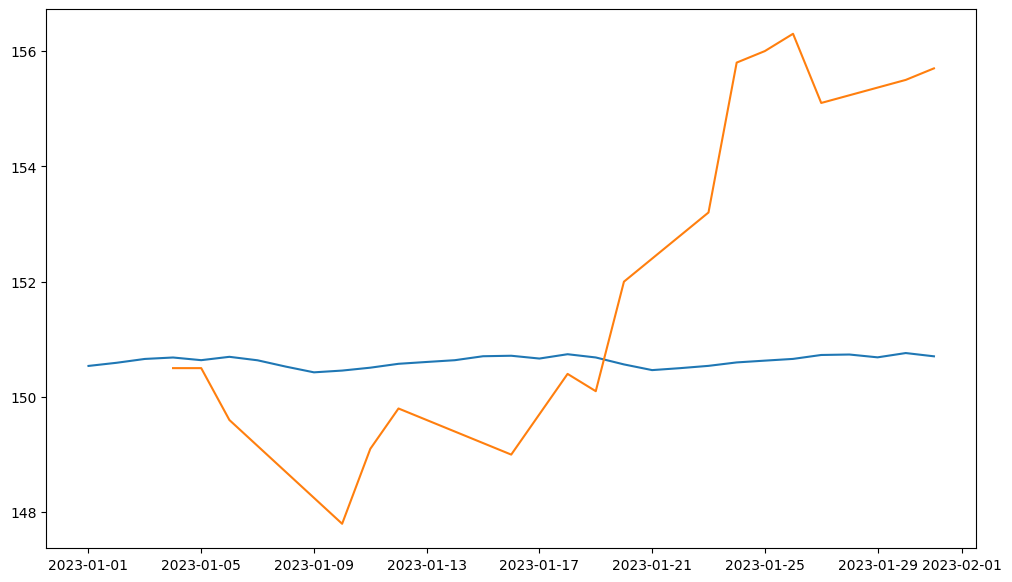

In [ ]:
from datetime import datetime
start = datetime(2023, 1, 1)
end = datetime(2023, 1, 31)
y = result.get_forecast(steps=31)
y_index = pd.bdate_range(start=start, end=end, freq='D')
y_values = y.predicted_mean
y_ci = y.conf_int()
y_ci
plt.plot(y_index, y_values, label='predicted')
plt.plot(data.loc['2023-01-01':'2023-01-31']['close'], label='actual')
print(y_index)